# MCNF class

Julia class for storing, loading and solving MCNF problems.

In [1]:
include("/home/aschulz/Documents/mcnf_gcn/src/julia/mcnf_gcn/mcnf.jl")

Main.MCNFs

In [2]:
using Graphs
using GraphPlot

using .MCNFs

In [3]:
instance_path = "/home/aschulz/Documents/huawei_project/multiflow/instances/prc/small/flexE/1"

"/home/aschulz/Documents/huawei_project/multiflow/instances/prc/small/flexE/1"

In [4]:
mcnf = load_mcnf(instance_path)

MCNF(SimpleDiGraph{Int64}(988, [[13, 23], [11], [35, 42], [13, 22], [42, 43], [16, 39], [8, 9, 11, 12, 14, 15, 22, 24, 27, 28, 29, 33, 35, 38, 40, 45, 46, 47, 48], [7, 9, 13, 16, 17, 22, 23, 24, 25, 26  …  28, 29, 36, 38, 40, 41, 43, 44, 45, 47], [7, 8, 10, 13, 15, 16, 20, 22, 25, 27  …  33, 34, 36, 37, 39, 41, 42, 43, 46, 48], [9, 11, 12, 13, 14, 15, 16, 18, 21, 23  …  28, 32, 33, 34, 36, 40, 44, 46, 47, 48]  …  [71], [49, 50, 71], [49, 71], [50, 71], [50, 71], [49, 50, 71], [49, 71], [49, 71], [49, 71], [51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70]], [[13, 23], [11], [35, 42], [13, 22], [42, 43], [16, 39], [8, 9, 11, 12, 14, 15, 22, 24, 27, 28, 29, 33, 35, 38, 40, 45, 46, 47, 48], [7, 9, 13, 16, 17, 22, 23, 24, 25, 26  …  28, 29, 36, 38, 40, 41, 43, 44, 45, 47], [7, 8, 10, 13, 15, 16, 20, 22, 25, 27  …  33, 34, 36, 37, 39, 41, 42, 43, 46, 48], [9, 11, 12, 13, 14, 15, 16, 18, 21, 23  …  28, 32, 33, 34, 36, 40, 44, 46, 47, 48]  …  [71], [49, 50, 71], 

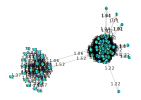

In [50]:
nodelabel = 1:nv(mcnf.G)
edgelabel = [string(round(mcnf.costs[src(v), dst(v)], digits=2)) for v in edges(mcnf.G)]

gplot(mcnf.G, nodelabel=nodelabel, edgelabel=edgelabel)

In [69]:
function is_origin_destination_node(instance::MCNF, u::Int64)
    return (u in instance.demands[:,1]) || (u in instance.demands[:,2])
end

function is_removable_1(instance::MCNF, u::Int64)
    if is_origin_destination_node(instance, u)
        return false
    end
    neighbors = all_neighbors(instance.G, u)
    if length(neighbors) != 2
        return false
    end
    return !(has_edge(instance.G, neighbors[1], neighbors[2]) || has_edge(instance.G, neighbors[2], neighbors[1]))
end

function transformation_1(instance::MCNF, u::Int64)
    neighbs = all_neighbors(instance.G,u)
    
    r_vw = instance.G.edges[v,u]["cost"]+instance.G.edges[u,w]["cost"]
    r_wv = instance.G.edges[w,u]["cost"]+instance.G.edges[u,v]["cost"]
    
    c_vw = min(instance.G.edges[v,u]["bandwidth"],instance.G.edges[u,w]["bandwidth"])
    c_wv = min(instance.G.edges[w,u]["bandwidth"],instance.G.edges[u,v]["bandwidth"])
    
    instance.G.remove_node(u)
    instance.G.add_edge(v,w, cost=r_vw, bandwidth=c_vw)
    instance.G.add_edge(w,v, cost=r_wv, bandwidth=c_wv)

is_removable_1 (generic function with 2 methods)

In [70]:
for u in vertices(mcnf.G)
    println(u, " ", is_removable_1(mcnf, u))
end

1 false
2 false
3 false
4 false
5 false
6 false
7 false
8 false
9 false
10 false
11 false
12 false
13 false
14 false
15 false
16 false
17 false
18 false
19 false
20 false
21 false
22 false
23 false
24 false
25 false
26 false
27 false
28 false
29 false
30 false
31 false
32 false
33 false
34 false
35 false
36 false
37 false
38 false
39 false
40 false
41 false
42 false
43 false
44 false
45 false
46 false
47 false
48 false
49 false
50 false
51 true
52 true
53 false
54 false
55 true
56 false
57 false
58 false
59 false
60 false
61 true
62 false
63 false
64 true
65 true
66 true
67 false
68 true
69 true
70 false
71 false


In [11]:
# contraction test
for edge in edges(mcnf.G)
    
end

10-element Vector{Int64}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [47]:
string(round(1.33333, digits=3))

"1.333"